## Analysis Experiment 3 in "Risk optimization during ongoing movement: Insights from movement and gaze behavior in throwing"

---

Authors: Stephan Zahno, Damian Beck, Ralf Kredel, André Klostermann, & Ernst-Joachim Hossner

---

The notebook takes input data from 'data/data_exp3.xlsx' and analyzes:


1. participants' strategies (i.e. horizontal shifts) as a function of penalty (0 vs -500 vs -2000) x distance (30 vs 45 vs 60)  
    It generates bar plots, descriptive statistics and runs repeated measures ANOVAs to test interaction effects for the 3 variables:

    a. ball's impact location (Figure 7 right in paper)  
    b. final gaze fixation location (Figure 7 left in paper)  
    c. difference between the locations of the final gaze fixation and ball's impact

2. participants' strategies (i.e. horizontal shifts) vs. optimal horizontal shifts (predicted by the maximum expected gain model)  
    For that aim, it

   a. plots actual data vs. model predictions  
   b. plots locations of final fixation vs. ball's impact vs. optimal aim point  in target space  
   c. tests wether the difference between fixation-optimal is sig. larger than ball-optimal.  

All plots are displayed in the Notebook and exported to the folder "figures".

---


To ensure that the code runs properly, consider activating our "VR_throwing" conda environment

In [ ]:
# Step 1: Create a new Conda environment using the provided environment.yml file
!conda env create -f ../environment.yml

# Step 2: Verify that the environment was created successfully
!conda env list

# Step 3: Check that the 'VR_throwing' environment is available
!conda info --envs

# Step 4: Activate the 'VR_throwing' environment

# NOTE: You cannot directly activate a Conda environment in a Jupyter Notebook.
# If you are NOT already running this notebook in the desired environment, follow these steps:
# 1. Install ipykernel in the 'VR_throwing' environment:
#    conda install -n VR_throwing ipykernel
# 2. Add the environment to Jupyter as a kernel:
#    python -m ipykernel install --user --name=VR_throwing --display-name "Python (VR_throwing)"
# 3. Restart this notebook and select the "Python (VR_throwing)" kernel from the Kernel menu.


---

## Analysis Script

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

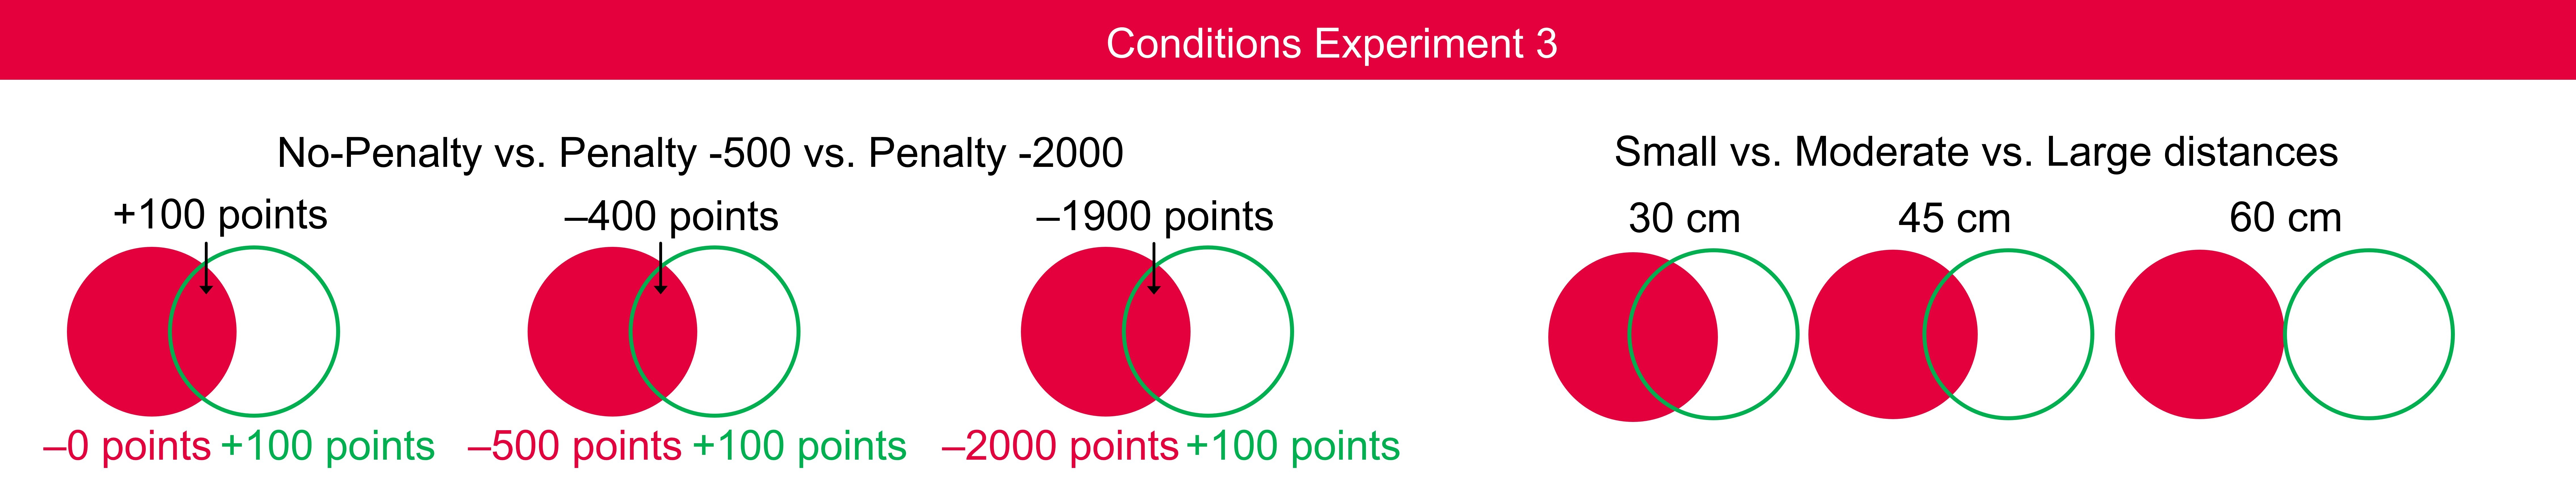

In [3]:
from IPython.display import display, Image
display(Image(filename=r'../figures/conditions_exp3.jpg'))

### Import Data

In [4]:
file_path = '../data/data_exp3.xlsx'
data = pd.read_excel(file_path)

### Aggregate Data for Analysis

In [5]:
aggregated_data_individual = data.groupby(['Vpn', 'Penalty_condition', 'Distance_condition']).agg({
    'Ball_impact_shift_x': ['mean'],
    'Ball_impact_y': ['mean'],
    'final_fixation_shift_x': ['mean'],
    'final_fixation_y': ['mean'],
    'diff_ball_fixation_shift_x': ['mean'],
    'optimal_shift_x': ['mean'], 
    'diff_fixation_optimal': ['mean'],
    'diff_ball_optimal': ['mean'],
}).reset_index()

aggregated_data_individual.columns = [
    'Vpn', 'Penalty_condition', 'Distance_condition',
    'Ball_impact_shift_x_mean',
    'Ball_impact_y_mean',
    'final_fixation_shift_x_mean',
    'final_fixation_y_mean',
    'diff_ball_fixation_shift_x_mean',
    'optimal_shift_x_mean',
    'diff_fixation_optimal_mean',
    'diff_ball_optimal_mean'
    ]

---

## 1. Participants' strategies (i.e. horizontal shifts) as a function of penalty (0 vs -500 vs -2000) x distance (60 vs 45 vs 30)   

## a. Ball's impact location

### Bar plot (figure 7 in paper) and descriptive stats

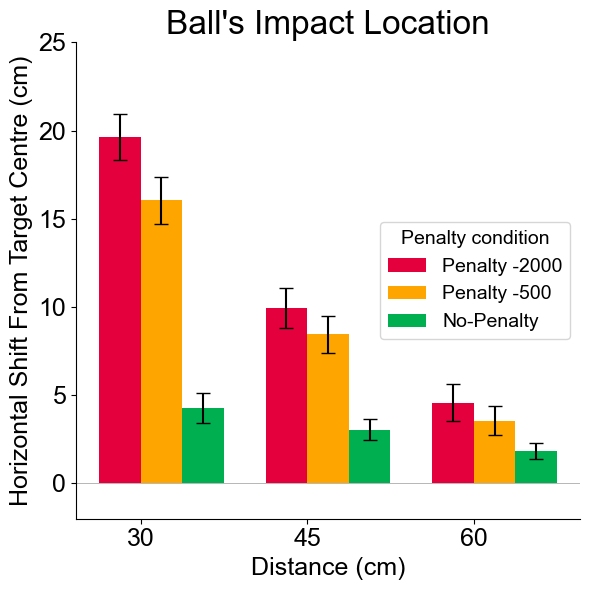

count       mean       std        min  \
Penalty_condition Distance_condition                                          
-2000             30                   20.0  19.623581  5.849738  11.807926   
                  45                   20.0   9.935086  5.005585  -0.716059   
                  60                   20.0   4.576043  4.739678  -1.353264   
-500              30                   20.0  16.053229  5.915664   6.368152   
                  45                   20.0   8.451834  4.778755   0.556666   
                  60                   20.0   3.551084  3.655304  -2.346547   
 0                30                   20.0   4.268792  3.884993  -2.529884   
                  45                   20.0   3.053332  2.763034  -3.317403   
                  60                   20.0   1.822315  2.031546  -1.169005   

                                            25%        50%        75%  \
Penalty_condition Distance_condition                                    
-2000             30                  15.343181  18.274818  23.658359   
                  45                   6.105485  11.235036  13.024374   
                  60                   0.072178   4.111278   8.301867   
-500              30                  12.626851  15.307788  20.516268   
                  45                   5.228887   7.557689  10.257246   
                  60                   1.064443   2.981437   6.285051   
 0                30                   1.912697   3.147718   7.053560   
                  45                   1.640881   3.256267   4.322861   
                  60                   0.822600   2.009365   2.653210   

                                            max  
Penalty_condition Distance_condition             
-2000             30                  34.071789  
                  45                  18.312391  
                  60                  14.116683  
-500              30                  28.815123  
                  45                  22.925766  
                  60                  10.520160  
 0                30                  11.096052  
                  45                   9.808620  
                  60                   6.512739

In [6]:
# Font
plt.rcParams['font.family'] = 'Arial'

# Mean and standard error of Ball_impact_shift_x for each condition
grouped_data = aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['Ball_impact_shift_x_mean'].agg(['mean', 'count', 'std']).reset_index()
# Standard error in grouped_data
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Get the unique levels of Distance_condition and Penalty_condition
distance_conditions = grouped_data['Distance_condition'].unique()
penalty_conditions = grouped_data['Penalty_condition'].unique()

# Plot aesthetics
bar_width = 0.25  
penalty_color = {0: '#00b050', -500: '#FFA500', -2000:'#e4003c'}
legend_labels = {0: 'No-Penalty', -500: 'Penalty -500', -2000: 'Penalty -2000'}
plt.figure(figsize=(6,6))
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='grey', linewidth=0.4, zorder=1)

# Loop through each level of Distance_condition and Penalty_condition and plot the bars with error bars
for i, distance_condition in enumerate(distance_conditions):
    for j, penalty_condition in enumerate(penalty_conditions):
        # Get the mean and SE for the specific Distance_condition and Penalty_condition
        mean = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                                (grouped_data['Penalty_condition'] == penalty_condition), 'mean'].values[0]
        se = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                              (grouped_data['Penalty_condition'] == penalty_condition), 'SE'].values[0]
        # Position of the bar on the x-axis
        bar_position = i - bar_width/2 + j * bar_width
        # Plot the bar and the error bar
        plt.bar(bar_position, mean, width=bar_width, label=f'{legend_labels[penalty_condition]}' if i == 0 else "", 
                color=penalty_color[penalty_condition], yerr=se, capsize=5, zorder=3)
        
# Set the x-ticks, labels, title, and legend
plt.xticks(range(len(distance_conditions)), labels=distance_conditions)
plt.xlabel('Distance (cm)', fontsize=18)
plt.ylabel('Horizontal Shift From Target Centre (cm)', fontsize=18)
plt.title("Ball's Impact Location", fontsize=24)
plt.legend(fontsize=14, title='Penalty condition', title_fontsize=14, loc= 'center right')
plt.ylim(-2, 18)
plt.yticks(range(0, 26, 5), fontsize=18)
plt.xticks(range(len(distance_conditions)), labels=distance_conditions, fontsize=18)
plt.tight_layout()

# Export plot to folder "figures"
plt.savefig(f'../figures/ball_impact_exp3.png',dpi=300)
plt.show()

# Display descriptive statistics for Ball_impact_shift_x
aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['Ball_impact_shift_x_mean'].describe()

### Inferential stats: Ball's impact location

#### 3 (Penalty: 0 vs. -500 vs. -2000) x 3 (Distance: 30 vs. 45 vs. 60) ANOVA with repeated measures
#### Testing interaction effect

In [7]:
# ANOVA using Pingouin package 

# Check assumptions
# Check normality
for (penalty, condition), group in aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition']):
    # Perform normality test on 'Ball_impact_shift_x_mean'
    normality = pg.normality(group['Ball_impact_shift_x_mean'], method='shapiro', alpha=0.05)
    print(f"Penalty Condition: {penalty}, Distance Condition: {condition}")
    print(normality)

# Check sphericity
# Greenhouse-Geisser correction is applied if eps < 0.75

# Perform repeated measures ANOVA
# Reporting F and p-value and partial eta square
anova_ball_impact = pg.rm_anova(data=aggregated_data_individual, dv='Ball_impact_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', effsize="np2")
print(anova_ball_impact)

# Perform post-hoc tests
posthoc_ball_impact = pg.pairwise_tests(data=aggregated_data_individual, dv='Ball_impact_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', padjust='bonf', effsize="cohen").round(3)
posthoc_ball_impact

Penalty Condition: -2000, Distance Condition: 30
                                 W      pval  normal
Ball_impact_shift_x_mean  0.941234  0.252984    True
Penalty Condition: -2000, Distance Condition: 45
                                 W      pval  normal
Ball_impact_shift_x_mean  0.954121  0.433983    True
Penalty Condition: -2000, Distance Condition: 60
                                 W      pval  normal
Ball_impact_shift_x_mean  0.922088  0.108698    True
Penalty Condition: -500, Distance Condition: 30
                               W      pval  normal
Ball_impact_shift_x_mean  0.9709  0.773753    True
Penalty Condition: -500, Distance Condition: 45
                                 W      pval  normal
Ball_impact_shift_x_mean  0.905024  0.051276    True
Penalty Condition: -500, Distance Condition: 60
                                 W      pval  normal
Ball_impact_shift_x_mean  0.950959  0.381877    True
Penalty Condition: 0, Distance Condition: 30
                                

c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inplace=True)


,Contrast,Penalty_condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Penalty_condition,-,-2000,-500,True,True,4.132,19.0,two-sided,0.001,0.002,bonf,60.095,0.455
1,Penalty_condition,-,-2000,0,True,True,7.612,19.0,two-sided,0.000,0.000,bonf,4.722e+04,2.333
2,Penalty_condition,-,-500,0,True,True,6.085,19.0,two-sided,0.000,0.000,bonf,2855.895,1.827
3,Distance_condition,-,30,45,True,True,12.679,19.0,two-sided,0.000,0.000,bonf,9.037e+07,1.764
4,Distance_condition,-,30,60,True,True,18.594,19.0,two-sided,0.000,0.000,bonf,5.109e+10,3.094
5,Distance_condition,-,45,60,True,True,9.090,19.0,two-sided,0.000,0.000,bonf,5.587e+05,1.227
6,Penalty_condition * Distance_condition,-2000,30,45,True,True,10.835,19.0,two-sided,0.000,0.000,bonf,7.675e+06,1.780
7,Penalty_condition * Distance_condition,-2000,30,60,True,True,12.125,19.0,two-sided,0.000,0.000,bonf,4.441e+07,2.827
8,Penalty_condition * Distance_condition,-2000,45,60,True,True,6.787,19.0,two-sided,0.000,0.000,bonf,1.07e+04,1.099
9,Penalty_condition * Distance_condition,-500,30,45,True,True,9.411,19.0,two-sided,0.000,0.000,bonf,9.259e+05,1.414


---

## b. Final gaze fixation location

### Bar plot (Figure 7 in paper) and descriptive stats


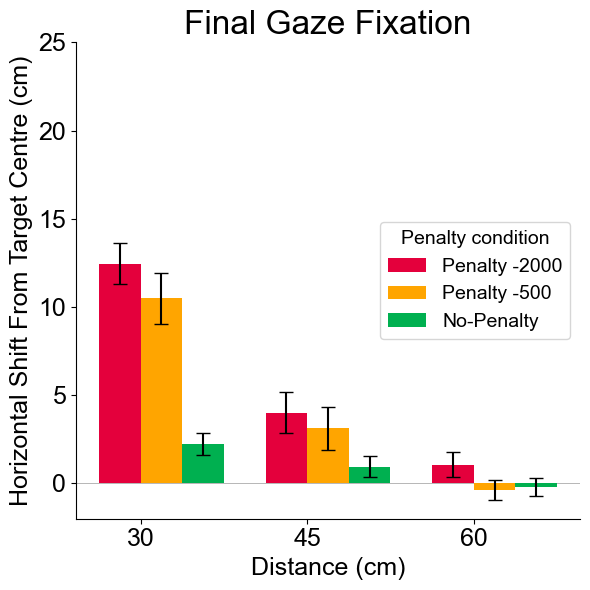

count       mean       std       min  \
Penalty_condition Distance_condition                                         
-2000             30                   20.0  12.442090  5.185960  4.367570   
                  45                   20.0   4.016979  5.172036 -3.948479   
                  60                   20.0   1.059068  3.159025 -5.632924   
-500              30                   20.0  10.481579  6.456137 -1.928071   
                  45                   20.0   3.113507  5.507647 -6.751345   
                  60                   20.0  -0.385463  2.576025 -7.199851   
 0                30                   20.0   2.240815  2.728001 -4.464250   
                  45                   20.0   0.957262  2.603886 -3.208144   
                  60                   20.0  -0.200415  2.186038 -5.024627   

                                           25%        50%        75%  \
Penalty_condition Distance_condition                                   
-2000             30                  9.576266  11.553033  14.910304   
                  45                  0.679763   3.937623   6.097428   
                  60                 -0.571681   0.292534   1.758143   
-500              30                  7.122382  10.602915  14.182232   
                  45                 -0.155747   3.107045   4.425201   
                  60                 -1.307225  -0.521065   0.552190   
 0                30                  0.621752   1.889713   3.976320   
                  45                 -1.215267   1.364078   2.517388   
                  60                 -1.436538   0.168209   0.736865   

                                            max  
Penalty_condition Distance_condition             
-2000             30                  25.707120  
                  45                  18.653080  
                  60                   9.046102  
-500              30                  24.699862  
                  45                  19.619506  
                  60                   5.907538  
 0                30                   7.458808  
                  45                   7.723860  
                  60                   4.187264

In [8]:
# Font
plt.rcParams['font.family'] = 'Arial'

# Mean and standard error of final_fixation_shift_x_mean for each condition
grouped_data = aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['final_fixation_shift_x_mean'].agg(['mean', 'count', 'std']).reset_index()
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Get the unique levels of Distance_condition and Penalty_condition
distance_conditions = grouped_data['Distance_condition'].unique()
penalty_conditions = grouped_data['Penalty_condition'].unique()

# Plot aesthetics
bar_width = 0.25  
penalty_color = {0: '#00b050', -500: '#FFA500', -2000:'#e4003c'}
legend_labels = {0: 'No-Penalty', -500: 'Penalty -500', -2000: 'Penalty -2000'}
plt.figure(figsize=(6,6))
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='grey', linewidth=0.4, zorder=1)

# Loop through each level of Distance_condition and Penalty_condition and plot the bars with error bars
for i, distance_condition in enumerate(distance_conditions):
    for j, penalty_condition in enumerate(penalty_conditions):
        # Get the mean and SE for the specific Distance_condition and Penalty_condition
        mean = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                                (grouped_data['Penalty_condition'] == penalty_condition), 'mean'].values[0]
        se = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                              (grouped_data['Penalty_condition'] == penalty_condition), 'SE'].values[0]
        # position of the bar on the x-axis
        bar_position = i - bar_width/2 + j * bar_width
        # Plot the bar and the error bar with the updated legend labels
        plt.bar(bar_position, mean, width=bar_width, label=f'{legend_labels[penalty_condition]}' if i == 0 else "", 
                color=penalty_color[penalty_condition], yerr=se, capsize=5, zorder=3)
        
# Set the x-ticks, labels, title, and legend
plt.xticks(range(len(distance_conditions)), labels=distance_conditions)
plt.xlabel('Distance (cm)', fontsize=18)
plt.ylabel('Horizontal Shift From Target Centre (cm)', fontsize=18)
plt.title("Final Gaze Fixation", fontsize=24)
plt.legend(fontsize=14, title='Penalty condition', title_fontsize=14, loc= 'center right')
plt.ylim(-2, 18)
plt.yticks(range(0, 26, 5), fontsize=18)
plt.xticks(range(len(distance_conditions)), labels=distance_conditions, fontsize=18)
plt.tight_layout()

# Export plot to folder "figures"
plt.savefig(f'../figures/final_fixation_exp3.png',dpi=300)
plt.show()

# Display descriptive statistics for final_fixation_shift_x_mean
aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['final_fixation_shift_x_mean'].describe()

### Inferential stats: Final gaze fixation location

#### 3 (Penalty: 0 vs. -500 vs. -2000) x 3 (Distance: 30 vs. 45 vs. 60) ANOVA with repeated measures
#### Testing interaction effect

In [9]:
# ANOVA using Pingouin package 

# Check assumptions
# Check normality
for (penalty, condition), group in aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition']):
    # Perform normality test on 'final_fixation_shift_x_mean'
    normality = pg.normality(group['final_fixation_shift_x_mean'], method='shapiro', alpha=0.05)
    print(f"Penalty Condition: {penalty}, Distance Condition: {condition}")
    print(normality)

# Check sphericity
# Greenhouse-Geisser correction is applied if eps < 0.75

# Perform repeated measures ANOVA
# Reporting F and p-value and partial eta square
anova_final_fixation = pg.rm_anova(data=aggregated_data_individual, dv='final_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', effsize="np2")
print(anova_final_fixation)

# Perform post-hoc tests
posthoc_final_fixation = pg.pairwise_tests(data=aggregated_data_individual, dv='final_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', padjust='bonf', effsize="cohen").round(3)
posthoc_final_fixation

# Focus on the difference between penalty -500 and -2000 in the distance 30 condition
# a priori contrasts and one-sided t-tests

from scipy import stats

# Filter distance 30 condition data 
distance_30_data = aggregated_data_individual[aggregated_data_individual['Distance_condition'] == 30]
# Pivot the data
pivot_data = distance_30_data.pivot(index='Vpn', columns='Penalty_condition', values='final_fixation_shift_x_mean')
# Extract the specific data points for contrast analysis
contrast_data = pivot_data[[-2000, -500]]
# Perform two-sided paired t-test for a priori contrast between -2000 and -500 conditions
t_stat, p_value_two_sided = stats.ttest_rel(contrast_data[-2000], contrast_data[-500])
# Convert the two-sided p-value to a one-sided p-value
p_value_one_sided = p_value_two_sided / 2 if t_stat > 0 else 1 - (p_value_two_sided / 2)
print(f"One-sided a priori contrast t-statistic: {t_stat}, p-value: {p_value_one_sided}")

# Calculate the Cohen's d for the difference between -2000 and -500 penalty conditions
# Mean difference between the two conditions
mean_diff = np.mean(contrast_data[-2000] - contrast_data[-500])
# Standard deviation of the differences
std_diff = np.std(contrast_data[-2000] - contrast_data[-500], ddof=1)
# Calculate Cohen's d
cohens_d = mean_diff / std_diff

# Print the result
print(f"Cohen's d: {cohens_d}")


Penalty Condition: -2000, Distance Condition: 30
                                    W      pval  normal
final_fixation_shift_x_mean  0.950159  0.369506    True
Penalty Condition: -2000, Distance Condition: 45
                                    W      pval  normal
final_fixation_shift_x_mean  0.933403  0.179509    True
Penalty Condition: -2000, Distance Condition: 60
                                    W      pval  normal
final_fixation_shift_x_mean  0.882187  0.019374   False
Penalty Condition: -500, Distance Condition: 30
                                    W      pval  normal
final_fixation_shift_x_mean  0.980092  0.935283    True
Penalty Condition: -500, Distance Condition: 45
                                    W      pval  normal
final_fixation_shift_x_mean  0.905598  0.052575    True
Penalty Condition: -500, Distance Condition: 60
                                    W      pval  normal
final_fixation_shift_x_mean  0.926623  0.132936    True
Penalty Condition: 0, Distance Condit

c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


One-sided a priori contrast t-statistic: 1.986557976686777, p-value: 0.030793518330597684
Cohen's d: 0.4442078677116076


c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inplace=True)


---

## c. Difference of final gaze fixation location vs. ball location

### Bar plot and descriptive stats

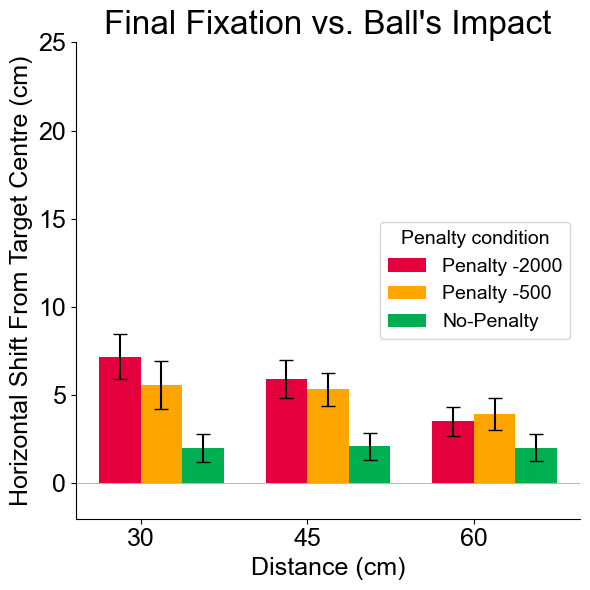

count      mean       std       min  \
Penalty_condition Distance_condition                                        
-2000             30                   20.0  7.181491  5.655419 -5.553528   
                  45                   20.0  5.918107  4.916417 -2.135779   
                  60                   20.0  3.516975  3.773705 -1.711892   
-500              30                   20.0  5.571650  6.015653 -2.642709   
                  45                   20.0  5.338327  4.162923  1.141170   
                  60                   20.0  3.936547  3.965139 -2.421323   
 0                30                   20.0  2.027977  3.586628 -3.491810   
                  45                   20.0  2.096070  3.445774 -4.418541   
                  60                   20.0  2.022730  3.404842 -3.574617   

                                           25%       50%       75%        max  
Penalty_condition Distance_condition                                           
-2000             30                  4.092966  6.810932  9.970598  19.215924  
                  45                  1.766248  6.203238  7.956458  16.704832  
                  60                  0.518011  2.599090  5.891293  12.423054  
-500              30                  2.451169  4.506854  6.903354  22.803958  
                  45                  2.249859  4.456473  6.160221  15.591993  
                  60                  1.294151  3.392716  5.264863  14.021771  
 0                30                 -0.259826  1.153680  3.023170  11.376461  
                  45                 -0.095357  2.168727  3.790961   9.331893  
                  60                 -0.508092  2.036580  3.429872  10.712584

In [10]:
# Font
plt.rcParams['font.family'] = 'Arial'

# Mean and standard error of 'diff_ball_fixation_shift_x_mean' for each condition
grouped_data = aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['diff_ball_fixation_shift_x_mean'].agg(['mean', 'count', 'std']).reset_index()
# Standard error in grouped_data
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Get the unique levels of Distance_condition and Penalty_condition
distance_conditions = grouped_data['Distance_condition'].unique()
penalty_conditions = grouped_data['Penalty_condition'].unique()

# Plot aesthetics
bar_width = 0.25  
penalty_color = {0: '#00b050', -500: '#FFA500', -2000:'#e4003c'}
legend_labels = {0: 'No-Penalty', -500: 'Penalty -500', -2000: 'Penalty -2000'}
plt.figure(figsize=(6,6))
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='grey', linewidth=0.4, zorder=1)

# Loop through each level of Distance_condition and Penalty_condition and plot the bars with error bars
for i, distance_condition in enumerate(distance_conditions):
    for j, penalty_condition in enumerate(penalty_conditions):
        # Get the mean and SE for the specific Distance_condition and Penalty_condition
        mean = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                                (grouped_data['Penalty_condition'] == penalty_condition), 'mean'].values[0]
        se = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                              (grouped_data['Penalty_condition'] == penalty_condition), 'SE'].values[0]
        # Position of the bar on the x-axis
        bar_position = i - bar_width/2 + j * bar_width
        # Plot the bar and the error bar with the updated legend labels
        plt.bar(bar_position, mean, width=bar_width, label=f'{legend_labels[penalty_condition]}' if i == 0 else "", 
                color=penalty_color[penalty_condition], yerr=se, capsize=5, zorder=3)
        
# Set the x-ticks, labels, title, and legend
plt.xticks(range(len(distance_conditions)), labels=distance_conditions)
plt.xlabel('Distance (cm)', fontsize=18)
plt.ylabel('Horizontal Shift From Target Centre (cm)', fontsize=18)
plt.title("Final Fixation vs. Ball's Impact", fontsize=24)
plt.legend(fontsize=14, title='Penalty condition', title_fontsize=14, loc= 'center right')
plt.ylim(-2, 18)
plt.yticks(range(0, 26, 5), fontsize=18)
plt.xticks(range(len(distance_conditions)), labels=distance_conditions, fontsize=18)

# Show the plot
plt.tight_layout()
# Export plot to folder "figures"
plt.savefig(f'../figures/diff_fixation_ball_exp3.png',dpi=300)
plt.show()

# Display descriptive statistics for diff_ball_fixation_shift_x_mean
aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['diff_ball_fixation_shift_x_mean'].describe()

## Inferential stats: Final fixation vs. Ball

#### 3 (Penalty: 0 vs. -500 vs. -2000) x 3 (Distance: 30 vs. 45 vs. 60) ANOVA with repeated measures
#### Testing interaction effect

In [11]:
# ANOVA using Pingouin package 

# Check assumptions
# Check normality
for (penalty, condition), group in aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition']):
    # Perform normality test on 'diff_ball_fixation_shift_x_mean'
    normality = pg.normality(group['diff_ball_fixation_shift_x_mean'], method='shapiro', alpha=0.05)
    print(f"Penalty Condition: {penalty}, Distance Condition: {condition}")
    print(normality)

# Check sphericity
# Greenhouse-Geisser correction is applied if eps < 0.75

# Perform repeated measures ANOVA
# Reporting F and p-value and partial eta square

anova_diff_fixation_ball = pg.rm_anova(data=aggregated_data_individual, dv='diff_ball_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', effsize="np2")
print(anova_diff_fixation_ball)

# Perform post-hoc tests
posthoc_diff_fixation_ball = pg.pairwise_tests(data=aggregated_data_individual, dv='diff_ball_fixation_shift_x_mean', within=['Distance_condition', 'Penalty_condition'], subject='Vpn', padjust='bonf', effsize="cohen").round(3)
posthoc_diff_fixation_ball

Penalty Condition: -2000, Distance Condition: 30
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.944453  0.290613    True
Penalty Condition: -2000, Distance Condition: 45
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.959543  0.534758    True
Penalty Condition: -2000, Distance Condition: 60
                                        W     pval  normal
diff_ball_fixation_shift_x_mean  0.952243  0.40243    True
Penalty Condition: -500, Distance Condition: 30
                                       W      pval  normal
diff_ball_fixation_shift_x_mean  0.83885  0.003487   False
Penalty Condition: -500, Distance Condition: 45
                                       W      pval  normal
diff_ball_fixation_shift_x_mean  0.84731  0.004806   False
Penalty Condition: -500, Distance Condition: 60
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.938494  0.224532    

c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inplace=True)


,Contrast,Distance_condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Distance_condition,-,30,45,True,True,0.935,19.0,two-sided,0.361,1.000,bonf,0.342,0.130
1,Distance_condition,-,30,60,True,True,2.553,19.0,two-sided,0.019,0.058,bonf,2.959,0.518
2,Distance_condition,-,45,60,True,True,2.173,19.0,two-sided,0.043,0.128,bonf,1.576,0.409
3,Penalty_condition,-,-2000,-500,True,True,0.817,19.0,two-sided,0.424,1.000,bonf,0.313,0.155
4,Penalty_condition,-,-2000,0,True,True,5.374,19.0,two-sided,0.000,0.000,bonf,716.431,1.054
5,Penalty_condition,-,-500,0,True,True,4.621,19.0,two-sided,0.000,0.001,bonf,159.944,0.863
6,Distance_condition * Penalty_condition,30,-2000,-500,True,True,1.097,19.0,two-sided,0.286,1.000,bonf,0.394,0.276
7,Distance_condition * Penalty_condition,30,-2000,0,True,True,4.025,19.0,two-sided,0.001,0.007,bonf,48.524,1.088
8,Distance_condition * Penalty_condition,30,-500,0,True,True,2.823,19.0,two-sided,0.011,0.098,bonf,4.784,0.716
9,Distance_condition * Penalty_condition,45,-2000,-500,True,True,0.570,19.0,two-sided,0.575,1.000,bonf,0.269,0.127


---

## 2. Participants' strategies (i.e. horizontal shift) vs. optimal horizontal shift (predicted by expected gain model)

## a. Plot data vs. model

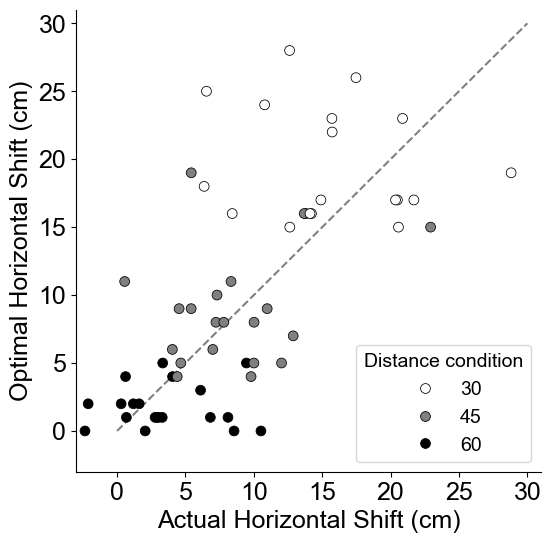

In [12]:
import seaborn as sns

# Font
plt.rcParams['font.family'] = 'Arial'

# Select data with penalty condition -500 or -2000
data_penalty = aggregated_data_individual[aggregated_data_individual['Penalty_condition'] == -500]

# Define a custom palette for white, black, and grey
custom_palette = {30: 'white', 45: 'grey', 60: 'black'}

# Plot
plt.figure(figsize=(6, 6))
# plot bisection line 
plt.plot([0, 30], [0, 30], linestyle='--', color='grey', zorder=1)
# plot actual vs. optimal shifts
sns.scatterplot(
    x='Ball_impact_shift_x_mean', 
    y='optimal_shift_x_mean', 
    hue='Distance_condition', 
    data=data_penalty, 
    palette=custom_palette, 
    s=50, alpha=1,
    edgecolor='black'
)

# Plot aesthetics
plt.xlabel('Actual Horizontal Shift (cm)', fontsize=18)
plt.ylabel('Optimal Horizontal Shift (cm)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid(False)
plt.xlim(-3, 31)
plt.ylim(-3, 31)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize = 14, title='Distance condition', title_fontsize=14, loc= 'lower right')

# Export plot to folder "figures"
plt.savefig(f'../figures/data_vs_model_exp3.png',dpi=300)
plt.show()


## b. Plot final fixation location vs. ball's impact location vs. optimal aim point location in target space 

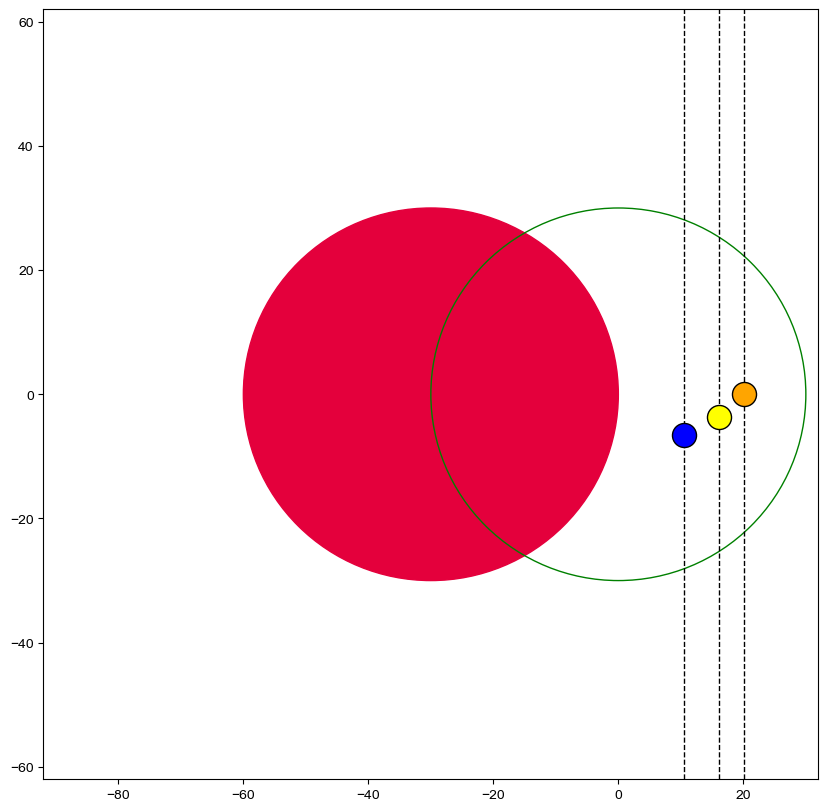

In [13]:

#### Select condition for plot
data_plot_targetspace = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -500) & (aggregated_data_individual['Distance_condition'] == 30)]
####

#Font
plt.figure(figsize=(10,10))

# Mean of final_fixation_shift_x_mean and final_fixation_y_mean
mean_final_fixation_shift_x = np.mean(data_plot_targetspace['final_fixation_shift_x_mean'])
mean_final_fixation_y = np.mean(data_plot_targetspace['final_fixation_y_mean'])

# Mean of Ball_impact_shift_x_mean and Ball_impact_shift_x_mean
mean_Ball_impact_shift_x = np.mean(data_plot_targetspace['Ball_impact_shift_x_mean'])
mean_Ball_impact_y = np.mean(data_plot_targetspace['Ball_impact_y_mean'])

# Mean of optimal_shift_x_mean
optimal_shift_x = np.mean(data_plot_targetspace['optimal_shift_x_mean'])
optimal_shift_y = 0

# Get distance condition to set the position of the red target circle
distance_condition = (data_plot_targetspace['Distance_condition'].iloc[0])
penalty_condition = (data_plot_targetspace['Penalty_condition'].iloc[0])

# Filled red circle with center with radius 30
red_circle = plt.Circle((distance_condition*-1, 0), 30, fill=True, color='#e4003c')
plt.gca().add_patch(red_circle)

# Green circle with center at (0,0) and radius 30
green_circle = plt.Circle((0, 0), 30, fill=False, color='green', linestyle='solid')
plt.gca().add_patch(green_circle)

# Vertical line to the mean point of Ball_impact_shift_x
plt.axvline(x=mean_Ball_impact_shift_x, color='black', linestyle='--', linewidth=1, zorder=1)
# Mean point of Ball_impact_shift_x and mean_Ball_impact_y as a yellow dot
plt.scatter(mean_Ball_impact_shift_x, mean_Ball_impact_y, c='yellow', alpha=1, marker='o', edgecolors='black', s=300, zorder=2)

# Vertical line to the mean point of final_fixation_shift_x
plt.axvline(x=mean_final_fixation_shift_x, color='black', linestyle='--', linewidth=1, zorder=1)
# Mean point of final_fixation_shift_x and final_fixation_y as a blue dot
plt.scatter(mean_final_fixation_shift_x, mean_final_fixation_y, c='blue', alpha=1, marker='o', edgecolors='black', s=300, zorder=2)

# Vertical line to the mean point of optimal aimpoint
plt.axvline(x=optimal_shift_x, color='black', linestyle='--', linewidth=1, zorder=1)
# Plot the mean point of optimal aimpoint as a red dot 
plt.scatter(optimal_shift_x, optimal_shift_y, c='orange', alpha=1, marker='o', edgecolors='black', s=300, zorder=2)

# Set the x and y limits
plt.xlim(-92, 32)
plt.ylim(-62, 62)

# Export plot to folder "figures"
plt.savefig(f'../figures/target_space{distance_condition}_{penalty_condition}.png',dpi=300)
plt.show()


## c. Test wether the difference between fixation-optimal is sig. larger than ball-optimal

- in penalty -500 / distance 30
- in penalty -500 / distance 45
- in penalty -2000 / distance 30
- in penalty -2000 / distance 45

In [14]:
# Filter data for penalty condition -500 and distance condition 30
data_penalty_30 = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -500) & (aggregated_data_individual['Distance_condition'] == 30)]
# Filter data for penalty condition -500 and distance condition 45
data_penalty_45 = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -500) & (aggregated_data_individual['Distance_condition'] == 45)]
# Filter data for penalty condition -2000 and distance condition 30
data_penalty_2000_30 = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -2000) & (aggregated_data_individual['Distance_condition'] == 30)]
# Filter data for penalty condition -2000 and distance condition 45
data_penalty_2000_45 = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -2000) & (aggregated_data_individual['Distance_condition'] == 45)]


### Run paired t-tests 
- Two-sided
- Bonferroni correction (as four t-tests were performed)

### Condition: Penalty -500, Distance 30

In [15]:
# Run paired t-test and calculate Cohen's d
# Check assumptions

data_penalty_30 = data_penalty_30.assign(differences_30 = data_penalty_30.loc[:, 'diff_fixation_optimal_mean'] - data_penalty_30.loc[:, 'diff_ball_optimal_mean'])
normality = pg.normality(data_penalty_30["differences_30"], method='shapiro', alpha=0.05)
print(normality) # Normality is violated, we will check with Wilcoxon signed-rank test

ttest_results_30 = pg.ttest(data_penalty_30['diff_fixation_optimal_mean'], data_penalty_30['diff_ball_optimal_mean'], paired=True)
print(ttest_results_30)

wilcoxon_results_30 = pg.wilcoxon(data_penalty_30['diff_fixation_optimal_mean'], data_penalty_30['diff_ball_optimal_mean'], alternative='two-sided')
print(wilcoxon_results_30) # No difference in interpretation

# Apply Bonferroni correction
bonferroni_p_value = ttest_results_30.iloc[0]['p-val'] * 4

bonferroni_p_value = min(bonferroni_p_value, 1)

print("\nP-value after Bonferroni correction:")
print(bonferroni_p_value)

                      W      pval  normal
differences_30  0.83885  0.003487   False
               T  dof alternative     p-val         CI95%   cohen-d    BF10  \
T-test  4.142057   19   two-sided  0.000554  [2.76, 8.39]  0.650175  61.257   

           power  
T-test  0.787617  
          W-val alternative     p-val       RBC    CLES
Wilcoxon   10.0   two-sided  0.000082  0.904762  0.6625

P-value after Bonferroni correction:
0.002215696542897862


### Condition: Penalty -500, Distance 45

In [16]:
# Run paired t-test and calculate Cohen's d
# Check assumptions
data_penalty_45 = data_penalty_45.assign(differences_45 = data_penalty_45.loc[:, 'diff_fixation_optimal_mean'] - data_penalty_45.loc[:, 'diff_ball_optimal_mean'])
normality = pg.normality(data_penalty_45["differences_45"], method='shapiro', alpha=0.05)
print(normality) # Normality is violated, we will check with Wilcoxon signed-rank test

ttest_results_45 = pg.ttest(data_penalty_45['diff_fixation_optimal_mean'], data_penalty_45['diff_ball_optimal_mean'], paired=True)
print(ttest_results_45)

wilcoxon_results_45 = pg.wilcoxon(data_penalty_45['diff_fixation_optimal_mean'], data_penalty_45['diff_ball_optimal_mean'], alternative='two-sided')
print(wilcoxon_results_45) # No difference in interpretation

# Apply Bonferroni correction
bonferroni_p_value = ttest_results_45.iloc[0]['p-val'] * 4
bonferroni_p_value = min(bonferroni_p_value, 1)

print("\nP-value after Bonferroni correction:")
print(bonferroni_p_value)

                      W      pval  normal
differences_45  0.84731  0.004806   False
               T  dof alternative     p-val         CI95%   cohen-d      BF10  \
T-test  5.734847   19   two-sided  0.000016  [3.39, 7.29]  0.834915  1453.896   

           power  
T-test  0.942872  
          W-val alternative     p-val  RBC  CLES
Wilcoxon    0.0   two-sided  0.000002  1.0  0.75

P-value after Bonferroni correction:
6.333268357742102e-05


### Condition: Penalty -2000, Distance 30

In [17]:
# Run paired t-test and calculate Cohen's d
# Check assumptions

data_penalty_2000_30 = data_penalty_2000_30.assign(differences_2000_30 = data_penalty_2000_30.loc[:, 'diff_fixation_optimal_mean'] - data_penalty_2000_30.loc[:, 'diff_ball_optimal_mean'])
normality = pg.normality(data_penalty_2000_30["differences_2000_30"], method='shapiro', alpha=0.05)
print(normality) # Normality is violated, we will check with Wilcoxon signed-rank test

ttest_results_2000_30 = pg.ttest(data_penalty_2000_30['diff_fixation_optimal_mean'], data_penalty_2000_30['diff_ball_optimal_mean'], paired=True)
print(ttest_results_2000_30)

wilcoxon_results_2000_30 = pg.wilcoxon(data_penalty_2000_30['diff_fixation_optimal_mean'], data_penalty_2000_30['diff_ball_optimal_mean'], alternative='two-sided')
print(wilcoxon_results_2000_30) # No difference in interpretation

# Apply Bonferroni correction
bonferroni_p_value = wilcoxon_results_2000_30.iloc[0]['p-val'] * 4

bonferroni_p_value = min(bonferroni_p_value, 1)

print("\nP-value after Bonferroni correction:")
print(bonferroni_p_value)

                            W      pval  normal
differences_2000_30  0.944453  0.290613    True
               T  dof alternative     p-val         CI95%   cohen-d      BF10  \
T-test  5.678908   19   two-sided  0.000018  [4.53, 9.83]  0.541451  1303.812   

           power  
T-test  0.632299  
          W-val alternative     p-val       RBC  CLES
Wilcoxon    6.0   two-sided  0.000027  0.942857  0.67

P-value after Bonferroni correction:
0.0001068115234375


### Condition: Penalty -2000, Distance 45

In [18]:
# Run paired t-test and calculate Cohen's d
# Check assumptions

data_penalty_2000_45 = data_penalty_2000_45.assign(differences_2000_45 = data_penalty_2000_45.loc[:, 'diff_fixation_optimal_mean'] - data_penalty_2000_45.loc[:, 'diff_ball_optimal_mean'])
normality = pg.normality(data_penalty_2000_45["differences_2000_45"], method='shapiro', alpha=0.05)
print(normality) # Normality is violated, we will check with Wilcoxon signed-rank test

ttest_results_2000_45 = pg.ttest(data_penalty_2000_45['diff_fixation_optimal_mean'], data_penalty_2000_45['diff_ball_optimal_mean'], paired=True)
print(ttest_results_2000_45)

wilcoxon_results_2000_45 = pg.wilcoxon(data_penalty_2000_45['diff_fixation_optimal_mean'], data_penalty_2000_45['diff_ball_optimal_mean'], alternative='two-sided')
print(wilcoxon_results_2000_45) # No difference in interpretation

# Apply Bonferroni correction
bonferroni_p_value = wilcoxon_results_2000_45.iloc[0]['p-val'] * 4

bonferroni_p_value = min(bonferroni_p_value, 1)

print("\nP-value after Bonferroni correction:")
print(bonferroni_p_value)

                            W      pval  normal
differences_2000_45  0.959543  0.534758    True
               T  dof alternative     p-val         CI95%  cohen-d     BF10  \
T-test  5.383306   19   two-sided  0.000034  [3.62, 8.22]   0.4714  730.197   

           power  
T-test  0.516457  
          W-val alternative     p-val      RBC    CLES
Wilcoxon    8.0   two-sided  0.000048  0.92381  0.6825

P-value after Bonferroni correction:
0.00019073486328125
